# Librerias y conexión a drive

In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Abriendo netCDF

In [4]:
ruta_tmax = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/PISCO_temperature/tx/PISCOdtx_v1.1.nc"
PISCO_tmax = xr.open_dataset(ruta_tmax)
PISCO_tmax

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 13149)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2016-12-31
Data variables:
    tx         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [5]:
ruta_tmin = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov1p1(tmin).nc"
PISCO_tmin = xr.open_dataset(ruta_tmin, decode_times=False)
PISCO_tmin

<xarray.Dataset>
Dimensions:  (T: 432, Y: 202, X: 145)
Coordinates:
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
  * Y        (Y) float32 1.35 1.25 1.15 1.05 ... -18.45 -18.55 -18.65 -18.75
  * X        (X) float32 -81.45 -81.35 -81.25 -81.15 ... -67.25 -67.15 -67.05
Data variables:
    tmin     (T, Y, X) float32 ...

In [6]:
PISCO_tmin = PISCO_tmin.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_tmin #corregir el tema de las coordenadas

<xarray.Dataset>
Dimensions:    (time: 432, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) float32 252.5 253.5 254.5 255.5 ... 681.5 682.5 683.5
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

In [7]:
PISCO_tmin["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
PISCO_tmin

<xarray.Dataset>
Dimensions:    (time: 432, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2016-12-31
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

# anomalia t max

## tmax 1981-2010

In [8]:
tmax_filtro=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmax_filtro

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 10592)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-06-01 1981-06-02 ... 2010-05-31
Data variables:
    tx         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [9]:
tmax_filtro=tmax_filtro.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))

In [10]:
tmax_acum = tmax_filtro.tx.mean(dim='time')
tmax_acum

<xarray.DataArray 'tx' (latitude: 61, longitude: 60)>
array([[18.561962, 22.028046, 23.870771, ..., 31.210928, 31.176605,
        31.148129],
       [19.566902, 23.90587 , 25.429306, ..., 31.106617, 31.081072,
        31.043062],
       [21.283512, 23.813305, 24.063187, ..., 31.013002, 31.04072 ,
        31.024744],
       ...,
       [      nan,       nan,       nan, ..., 15.22879 , 15.177912,
        15.655254],
       [      nan,       nan,       nan, ..., 15.737265, 15.660429,
        15.603186],
       [      nan,       nan,       nan, ..., 15.916923, 15.838228,
        15.601716]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
  * latitude   (latitude) float64 -12.55 -12.65 -12.75 ... -18.35 -18.45 -18.55

## tmax 1981-2016

In [11]:
tmax_anual=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2016-05-31T12:00:00.000000000'))
tmax_anual

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 12784)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-06-01 1981-06-02 ... 2016-05-31
Data variables:
    tx         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [12]:
tmax_anual=tmax_anual.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))

In [13]:
tmax_anual = tmax_anual.tx.groupby('time.year').mean(dim='time')
tmax_anual 

<xarray.DataArray 'tx' (year: 36, latitude: 61, longitude: 60)>
array([[[17.178024 , 20.430367 , 22.218836 , ..., 30.953133 ,
         30.960602 , 30.96572  ],
        [18.192081 , 22.306208 , 24.16004  , ..., 30.913149 ,
         30.911125 , 30.907696 ],
        [19.430998 , 22.052233 , 22.393032 , ..., 30.859503 ,
         30.880886 , 30.880157 ],
        ...,
        [       nan,        nan,        nan, ..., 14.612973 ,
         14.630854 , 15.155927 ],
        [       nan,        nan,        nan, ..., 15.110805 ,
         15.109101 , 14.949362 ],
        [       nan,        nan,        nan, ..., 15.291613 ,
         15.244715 , 14.934648 ]],

       [[18.284784 , 21.501194 , 23.146679 , ..., 30.99326  ,
         31.003782 , 30.990007 ],
        [19.319595 , 23.22184  , 24.90405  , ..., 30.926401 ,
         30.911472 , 30.887836 ],
        [20.736702 , 23.03855  , 23.292295 , ..., 30.84725  ,
         30.873426 , 30.868    ],
...
        [       nan,        nan,        nan, ..., 15.818463 ,
         15.733172 , 16.152012 ],
        [       nan,        nan,        nan, ..., 16.322725 ,
         16.187256 , 16.173786 ],
        [       nan,        nan,        nan, ..., 16.517925 ,
         16.416763 , 16.189508 ]],

       [[21.383574 , 24.565344 , 26.205765 , ..., 31.506039 ,
         31.447351 , 31.402626 ],
        [22.376532 , 26.362602 , 27.545847 , ..., 31.353052 ,
         31.306705 , 31.270676 ],
        [24.174454 , 26.331924 , 26.424803 , ..., 31.240948 ,
         31.266577 , 31.255959 ],
        ...,
        [       nan,        nan,        nan, ..., 17.18747  ,
         17.04215  , 17.402512 ],
        [       nan,        nan,        nan, ..., 17.703009 ,
         17.512913 , 17.582275 ],
        [       nan,        nan,        nan, ..., 17.878485 ,
         17.75511  , 17.604153 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
  * latitude   (latitude) float64 -12.55 -12.65 -12.75 ... -18.35 -18.45 -18.55
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Attributes:
    long_name:  layer
    min:        10.442651909646928
    max:        36.63146705249618

## creando anomalia

In [14]:
tmax_anom = (tmax_anual - tmax_acum).to_dataset(name="tx")
tmax_anom

<xarray.Dataset>
Dimensions:    (longitude: 60, latitude: 61, year: 36)
Coordinates:
  * longitude  (longitude) float64 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
  * latitude   (latitude) float64 -12.55 -12.65 -12.75 ... -18.35 -18.45 -18.55
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Data variables:
    tx         (year, latitude, longitude) float32 -1.384 -1.598 ... 1.917 2.002

In [15]:
anom_tx_df = tmax_anom.mean(dim=("latitude","longitude")).to_dataframe()
anom_tx_df.head()

,tx
year,
1981,-0.427164
1982,-0.259435
1983,0.714997
1984,-0.857891
1985,-0.689417


In [16]:
anom_tx_df["tx"].to_numpy()

array([-0.42716387, -0.25943452,  0.7149968 , -0.8578912 , -0.6894172 ,
       -0.62713   ,  0.5472601 ,  0.15017359, -0.5743826 , -0.2478593 ,
       -0.03962116, -0.12470178, -0.396943  , -0.03355372,  0.3632644 ,
       -0.31249663, -0.05990307,  0.96045834, -0.40860653, -0.3938733 ,
       -0.28328001, -0.1133564 ,  0.3189576 ,  0.16420923,  0.5512718 ,
        0.4455203 ,  0.29881167,  0.23640092,  0.5273285 ,  0.9060457 ,
        0.21144792,  0.30603576,  0.39274183,  0.5736096 ,  0.74691075,
        1.4649158 ], dtype=float32)

In [17]:
len(anom_tx_df["tx"].to_numpy())

36

In [18]:
anom_tx_df.head()

,tx
year,
1981,-0.427164
1982,-0.259435
1983,0.714997
1984,-0.857891
1985,-0.689417


## separacion de positivos y negativos

In [19]:
anom_pos_tx=anom_tx_df.copy()
anom_pos_tx[anom_pos_tx["tx"]<0]=np.NaN #valores negativos, NaN
anom_pos_tx.head()

,tx
year,
1981,NaN
1982,NaN
1983,0.714997
1984,NaN
1985,NaN


In [20]:
anom_neg_tx=anom_tx_df.copy()
anom_neg_tx[anom_neg_tx["tx"]>0]=np.NaN #valores negativos, NaN
anom_neg_tx.head()

,tx
year,
1981,-0.427164
1982,-0.259435
1983,NaN
1984,-0.857891
1985,-0.689417


## avance 1 grafica

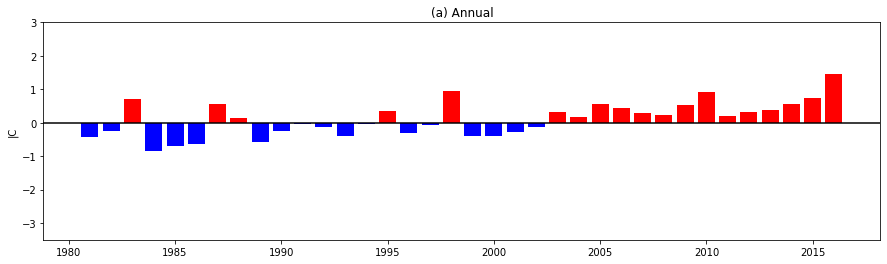

In [21]:
fig, ax = plt.subplots(figsize=(15, 4))
x= np.arange(1981,2017,1)
y_pos=anom_pos_tx["tx"].to_numpy()
y_neg=anom_neg_tx["tx"].to_numpy()
ax.bar(x,y_pos, color="red")
ax.bar(x,y_neg, color="blue")
ax.set_ylabel("|C")
ax.set_xlabel("")
ax.set_ylim(-3.5,3)
ax.set_title("(a) Annual")
plt.axhline(y=0, color='black', linestyle='-')

# anom min temp

## tmin 1981-2010

In [22]:
tmin_filtro=PISCO_tmin.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmin_filtro

<xarray.Dataset>
Dimensions:    (time: 348, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2010-05-31
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

In [23]:
tmin_filtro=tmin_filtro.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmin_filtro

<xarray.Dataset>
Dimensions:    (time: 348, latitude: 62, longitude: 60)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2010-05-31
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
Data variables:
    tmin       (time, latitude, longitude) float32 ...

In [24]:
tmin_acum = tmin_filtro.tmin.mean(dim='time') #1981-2010
tmin_acum

<xarray.DataArray 'tmin' (latitude: 62, longitude: 60)>
array([[ 8.290077 , 11.072148 , 13.1850815, ..., 20.628996 , 20.568293 ,
        20.500317 ],
       [ 9.145428 , 12.2184105, 14.345786 , ..., 20.568405 , 20.533304 ,
        20.493597 ],
       [10.652077 , 12.592588 , 13.247374 , ..., 20.535702 , 20.515203 ,
        20.515371 ],
       ...,
       [       nan,        nan,        nan, ..., -3.4187386, -3.0199928,
        -3.049671 ],
       [       nan,        nan,        nan, ..., -3.7946234, -3.65635  ,
        -3.231291 ],
       [       nan,        nan,        nan, ..., -3.5737767, -3.4373987,
        -3.2161524]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55

## tmin 1981-2016

In [25]:
tmin_anual=PISCO_tmin.sel(time=slice('1981-06-01T00:00:00.000000000','2016-05-31T12:00:00.000000000'))
tmin_anual

<xarray.Dataset>
Dimensions:    (time: 420, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2016-05-31
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

In [26]:
tmin_anual=tmin_anual.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))

In [27]:
tmin_anual = PISCO_tmin.tmin.groupby('time.year').mean(dim='time')
tmin_anual 

<xarray.DataArray 'tmin' (year: 36, latitude: 202, longitude: 145)>
array([[[        nan,         nan,         nan, ..., 23.318726  ,
         23.342543  , 23.326868  ],
        [        nan,         nan,         nan, ..., 23.273508  ,
         23.280373  , 23.271173  ],
        [        nan,         nan,         nan, ..., 23.264275  ,
         23.26796   , 23.256464  ],
        ...,
        [        nan,         nan,         nan, ..., -0.38564625,
          0.63861424, -1.275157  ],
        [        nan,         nan,         nan, ..., -0.85312986,
          1.6863098 ,  0.3185632 ],
        [        nan,         nan,         nan, ..., -1.551359  ,
          0.16884981,  2.1915636 ]],

       [[        nan,         nan,         nan, ..., 23.086111  ,
         23.162422  , 23.139345  ],
        [        nan,         nan,         nan, ..., 23.066086  ,
         23.07316   , 23.06618   ],
        [        nan,         nan,         nan, ..., 23.068476  ,
         23.060205  , 23.068153  ],
...
        [        nan,         nan,         nan, ...,  0.33027363,
          1.3379663 , -0.6262667 ],
        [        nan,         nan,         nan, ..., -0.20964085,
          2.3666105 ,  0.9692041 ],
        [        nan,         nan,         nan, ..., -0.9144623 ,
          0.8372342 ,  2.8804367 ]],

       [[        nan,         nan,         nan, ..., 22.608934  ,
         22.657583  , 22.62928   ],
        [        nan,         nan,         nan, ..., 22.5893    ,
         22.58806   , 22.571487  ],
        [        nan,         nan,         nan, ..., 22.595194  ,
         22.58126   , 22.573357  ],
        ...,
        [        nan,         nan,         nan, ..., -0.24999307,
          0.7743742 , -1.1896012 ],
        [        nan,         nan,         nan, ..., -0.7425194 ,
          1.8345203 ,  0.43506157],
        [        nan,         nan,         nan, ..., -1.4412345 ,
          0.30166045,  2.3508415 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Attributes:
    long_name:       Minimum Temperature
    units:           Celsius_scale
    colorscalename:  temp_colors
    ncolor:          254
    colormap:        [null 7208960 7208960 8519680 [8519680 15] 11146260 [111...
    maxncolor:       254

## creando anomalia

In [28]:
tmin_anom = (tmin_anual - tmin_acum).to_dataset(name="tmin")
tmin_anom #segun la grafica es con respecto a 2010

<xarray.Dataset>
Dimensions:    (latitude: 62, longitude: 60, year: 36)
Coordinates:
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2013 2014 2015 2016
Data variables:
    tmin       (year, latitude, longitude) float32 -0.1208 -0.1612 ... -0.2376

In [29]:
anom_tmin_df = tmin_anom.mean(dim=("latitude","longitude")).to_dataframe()
anom_tmin_df.head()

,tmin
year,
1981,-0.225841
1982,-0.124288
1983,0.270773
1984,0.082639
1985,-0.110767


## separacion de positivos y negativos

In [30]:
anom_pos_tmin=anom_tmin_df.copy()
anom_pos_tmin[anom_pos_tmin["tmin"]<0]=np.NaN 

In [31]:
anom_neg_tmin=anom_tmin_df.copy()
anom_neg_tmin[anom_neg_tmin["tmin"]>0]=np.NaN 

## avance 2 grafica

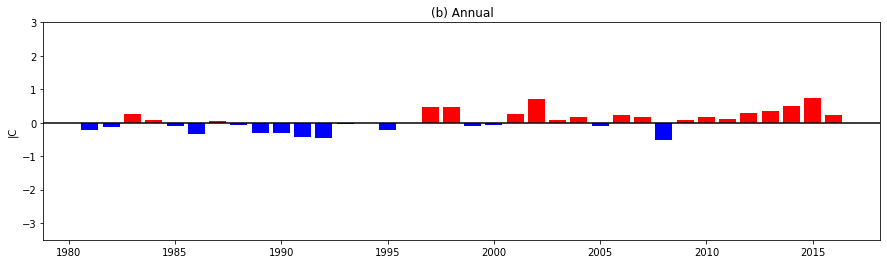

In [32]:
fig, ax = plt.subplots(figsize=(15, 4))
x= np.arange(1981,2017,1)
y_pos=anom_pos_tmin["tmin"].to_numpy()
y_neg=anom_neg_tmin["tmin"].to_numpy()
ax.bar(x,y_pos, color="red")
ax.bar(x,y_neg, color="blue")
ax.set_ylabel("|C")
ax.set_xlabel("")
ax.set_ylim(-3.5,3)
ax.set_title("(b) Annual")
plt.axhline(y=0, color='black', linestyle='-')

# RESULTADO

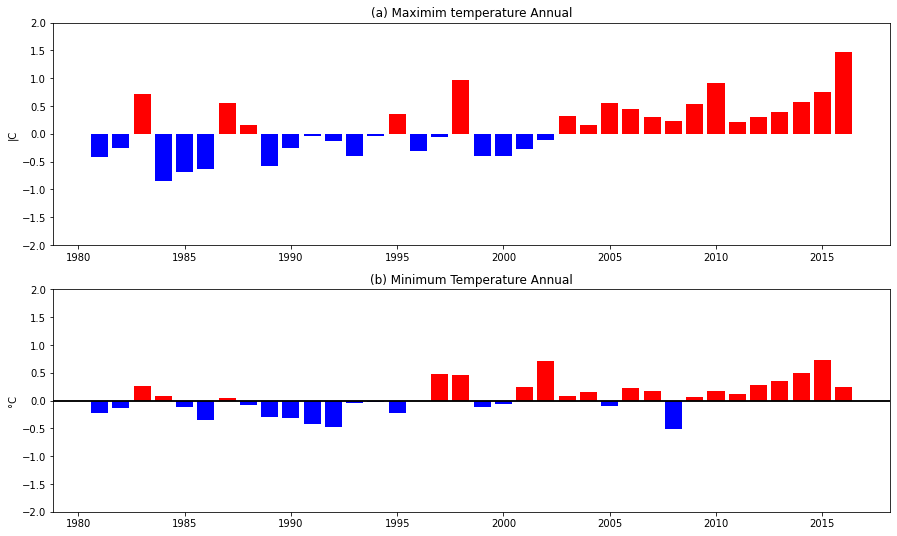

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(15, 9))
#Anom tmax
ax = axs[0]
x= np.arange(1981,2017,1)
y_pos=anom_pos_tx["tx"].to_numpy()
y_neg=anom_neg_tx["tx"].to_numpy()
ax.bar(x,y_pos, color="red")
ax.bar(x,y_neg, color="blue")
ax.set_ylabel("|C")
ax.set_xlabel("")
ax.set_ylim(-2,2)
ax.set_title("(a) Maximim temperature Annual")
plt.axhline(y=0, color='black', linestyle='-')

#anom tmin
ax2 = axs[1]
x2= np.arange(1981,2017,1)
y2_pos=anom_pos_tmin["tmin"].to_numpy()
y2_neg=anom_neg_tmin["tmin"].to_numpy()
ax2.bar(x2,y2_pos, color="red")
ax2.bar(x2,y2_neg, color="blue")
ax2.set_ylabel("°C")
ax2.set_xlabel("")
ax2.set_ylim(-2,2)
ax2.set_title("(b) Minimum Temperature Annual")
plt.axhline(y=0, color='black', linestyle='-')